In [56]:
#importando librerias
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [40]:
uci_data = pd.read_csv("uci_malware_detection.csv")

In [41]:
uci_data.head()

,Label,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_522,F_523,F_524,F_525,F_526,F_527,F_528,F_529,F_530,F_531
0,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [42]:
print(uci_data.shape)
print(pd.value_counts(uci_data['Label'], sort = True))

(373, 532)
Label
malicious        301
non-malicious     72
Name: count, dtype: int64


C:\Users\mldiazh\AppData\Local\Temp\ipykernel_35660\1576571235.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(uci_data['Label'], sort = True))


C:\Users\mldiazh\AppData\Local\Temp\ipykernel_35660\2404834489.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(uci_data['Label'], sort = True)


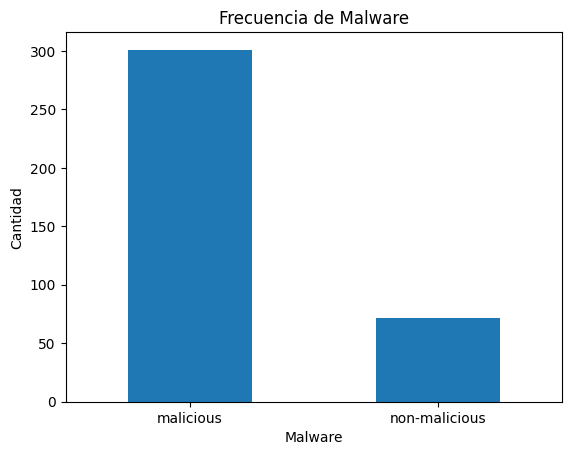

In [44]:
count_classes = pd.value_counts(uci_data['Label'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Frecuencia de Malware")
plt.xlabel("Malware")
plt.ylabel("Cantidad");

In [45]:
X = uci_data.copy().dropna()
y = X.pop('Label')

In [46]:
features_num = ['F_1', 'F_2', 'F_3', 'F_4', 'F_5', 'F_6', 'F_7', 'F_8', 'F_9', 'F_10', 'F_11', 'F_12', 'F_13', 'F_14', 'F_15', 'F_16', 'F_17', 'F_18', 'F_19', 'F_20', 'F_21', 'F_22', 'F_23', 'F_24', 'F_25', 'F_26', 'F_27', 'F_28', 'F_29', 'F_30', 'F_31', 'F_32', 'F_33', 'F_34', 'F_35', 'F_36', 'F_37', 'F_38', 'F_39', 'F_40', 'F_41', 'F_42', 'F_43', 'F_44', 'F_45', 'F_46', 'F_47', 'F_48', 'F_49', 'F_50', 'F_51', 'F_52', 'F_53', 'F_54', 'F_55', 'F_56', 'F_57', 'F_58', 'F_59', 'F_60', 'F_61', 'F_62', 'F_63', 'F_64', 'F_65', 'F_66', 'F_67', 'F_68', 'F_69', 'F_70', 'F_71', 'F_72', 'F_73', 'F_74', 'F_75', 'F_76', 'F_77', 'F_78', 'F_79', 'F_80', 'F_81', 'F_82', 'F_83', 'F_84', 'F_85', 'F_86', 'F_87', 'F_88', 'F_89', 'F_90', 'F_91', 'F_92', 'F_93', 'F_94', 'F_95', 'F_96', 'F_97', 'F_98', 'F_99', 'F_100', 'F_101', 'F_102', 'F_103', 'F_104', 'F_105', 'F_106', 'F_107', 'F_108', 'F_109', 'F_110', 'F_111', 'F_112', 'F_113', 'F_114', 'F_115', 'F_116', 'F_117', 'F_118', 'F_119', 'F_120', 'F_121', 'F_122', 'F_123', 'F_124', 'F_125', 'F_126', 'F_127', 'F_128', 'F_129', 'F_130', 'F_131', 'F_132', 'F_133', 'F_134', 'F_135', 'F_136', 'F_137', 'F_138', 'F_139', 'F_140', 'F_141', 'F_142', 'F_143', 'F_144', 'F_145', 'F_146', 'F_147', 'F_148', 'F_149', 'F_150', 'F_151', 'F_152', 'F_153', 'F_154', 'F_155', 'F_156', 'F_157', 'F_158', 'F_159', 'F_160', 'F_161', 'F_162', 'F_163', 'F_164', 'F_165', 'F_166', 'F_167', 'F_168', 'F_169', 'F_170', 'F_171', 'F_172', 'F_173', 'F_174', 'F_175', 'F_176', 'F_177', 'F_178', 'F_179', 'F_180', 'F_181', 'F_182', 'F_183', 'F_184', 'F_185', 'F_186', 'F_187', 'F_188', 'F_189', 'F_190', 'F_191', 'F_192', 'F_193', 'F_194', 'F_195', 'F_196', 'F_197', 'F_198', 'F_199', 'F_200', 'F_201', 'F_202', 'F_203', 'F_204', 'F_205', 'F_206', 'F_207', 'F_208', 'F_209', 'F_210', 'F_211', 'F_212', 'F_213', 'F_214', 'F_215', 'F_216', 'F_217', 'F_218', 'F_219', 'F_220', 'F_221', 'F_222', 'F_223', 'F_224', 'F_225', 'F_226', 'F_227', 'F_228', 'F_229', 'F_230', 'F_231', 'F_232', 'F_233', 'F_234', 'F_235', 'F_236', 'F_237', 'F_238', 'F_239', 'F_240', 'F_241', 'F_242', 'F_243', 'F_244', 'F_245', 'F_246', 'F_247', 'F_248', 'F_249', 'F_250', 'F_251', 'F_252', 'F_253', 'F_254', 'F_255', 'F_256', 'F_257', 'F_258', 'F_259', 'F_260', 'F_261', 'F_262', 'F_263', 'F_264', 'F_265', 'F_266', 'F_267', 'F_268', 'F_269', 'F_270', 'F_271', 'F_272', 'F_273', 'F_274', 'F_275', 'F_276', 'F_277', 'F_278', 'F_279', 'F_280', 'F_281', 'F_282', 'F_283', 'F_284', 'F_285', 'F_286', 'F_287', 'F_288', 'F_289', 'F_290', 'F_291', 'F_292', 'F_293', 'F_294', 'F_295', 'F_296', 'F_297', 'F_298', 'F_299', 'F_300', 'F_301', 'F_302', 'F_303', 'F_304', 'F_305', 'F_306', 'F_307', 'F_308', 'F_309', 'F_310', 'F_311', 'F_312', 'F_313', 'F_314', 'F_315', 'F_316', 'F_317', 'F_318', 'F_319', 'F_320', 'F_321', 'F_322', 'F_323', 'F_324', 'F_325', 'F_326', 'F_327', 'F_328', 'F_329', 'F_330', 'F_331', 'F_332', 'F_333', 'F_334', 'F_335', 'F_336', 'F_337', 'F_338', 'F_339', 'F_340', 'F_341', 'F_342', 'F_343', 'F_344', 'F_345', 'F_346', 'F_347', 'F_348', 'F_349', 'F_350', 'F_351', 'F_352', 'F_353', 'F_354', 'F_355', 'F_356', 'F_357', 'F_358', 'F_359', 'F_360', 'F_361', 'F_362', 'F_363', 'F_364', 'F_365', 'F_366', 'F_367', 'F_368', 'F_369', 'F_370', 'F_371', 'F_372', 'F_373', 'F_374', 'F_375', 'F_376', 'F_377', 'F_378', 'F_379', 'F_380', 'F_381', 'F_382', 'F_383', 'F_384', 'F_385', 'F_386', 'F_387', 'F_388', 'F_389', 'F_390', 'F_391', 'F_392', 'F_393', 'F_394', 'F_395', 'F_396', 'F_397', 'F_398', 'F_399', 'F_400', 'F_401', 'F_402', 'F_403', 'F_404', 'F_405', 'F_406', 'F_407', 'F_408', 'F_409', 'F_410', 'F_411', 'F_412', 'F_413', 'F_414', 'F_415', 'F_416', 'F_417', 'F_418', 'F_419', 'F_420', 'F_421', 'F_422', 'F_423', 'F_424', 'F_425', 'F_426', 'F_427', 'F_428', 'F_429', 'F_430', 'F_431', 'F_432', 'F_433', 'F_434', 'F_435', 'F_436', 'F_437', 'F_438', 'F_439', 'F_440', 'F_441', 'F_442', 'F_443', 'F_444', 'F_445', 'F_446', 'F_447', 'F_448', 'F_449', 'F_450', 'F_451', 'F_452', 'F_453', 'F_454', 'F_455', 'F_456', 'F_457', 'F_458', 'F_459', 'F_460', 'F_461', 'F_462', 'F_463', 'F_464', 'F_465', 'F_466', 'F_467', 'F_468', 'F_469', 'F_470', 'F_471', 'F_472', 'F_473', 'F_474', 'F_475', 'F_476', 'F_477', 'F_478', 'F_479', 'F_480', 'F_481', 'F_482', 'F_483', 'F_484', 'F_485', 'F_486', 'F_487', 'F_488', 'F_489', 'F_490', 'F_491', 'F_492', 'F_493', 'F_494', 'F_495', 'F_496', 'F_497', 'F_498', 'F_499', 'F_500', 'F_501', 'F_502', 'F_503', 'F_504', 'F_505', 'F_506', 'F_507', 'F_508', 'F_509', 'F_510', 'F_511', 'F_512', 'F_513', 'F_514', 'F_515', 'F_516', 'F_517', 'F_518', 'F_519', 'F_520', 'F_521', 'F_522', 'F_523', 'F_524', 'F_525', 'F_526', 'F_527', 'F_528', 'F_529', 'F_530', 'F_531']

In [47]:
uci_data.head()

,Label,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_522,F_523,F_524,F_525,F_526,F_527,F_528,F_529,F_530,F_531
0,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [48]:
preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
)

In [49]:
# Supongamos que X son las características y y es la variable objetivo
# Reemplaza X e y con tus datos reales
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Ahora, dividimos el conjunto temporal (que contiene el 30% de los datos restantes) en validación y prueba
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Imprimimos las formas de los conjuntos resultantes para verificar
print("Forma del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Forma del conjunto de validación:", X_val.shape, y_val.shape)
print("Forma del conjunto de prueba:", X_test.shape, y_test.shape)

Forma del conjunto de entrenamiento: (298, 531) (298,)
Forma del conjunto de validación: (37, 531) (37,)
Forma del conjunto de prueba: (38, 531) (38,)


In [102]:
# Convertir etiquetas a valores numéricos
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [103]:
# Inicializar el clasificador Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
random_forest.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = random_forest.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}".format(accuracy))

# Mostrar el informe de clasificación
print(classification_report(y_test, y_pred))


# Calcular métricas de evaluación
# Calcular la precisión
precision = precision_score(y_test, y_pred, pos_label=1)

# Calcular el recall
recall = recall_score(y_test, y_pred, pos_label=1)

auc_roc = roc_auc_score(y_test,y_pred)


print("Precisión:", precision)
print("Sensibilidad:", recall)
print("AUC-ROC:", auc_roc)


Precisión del modelo: 0.97
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.89      1.00      0.94         8

    accuracy                           0.97        38
   macro avg       0.94      0.98      0.96        38
weighted avg       0.98      0.97      0.97        38

Precisión: 0.8888888888888888
Sensibilidad: 1.0
AUC-ROC: 0.9833333333333334


In [106]:
#definimos funciona para mostrar los resultados
def mostrar_resultados(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, y_pred))

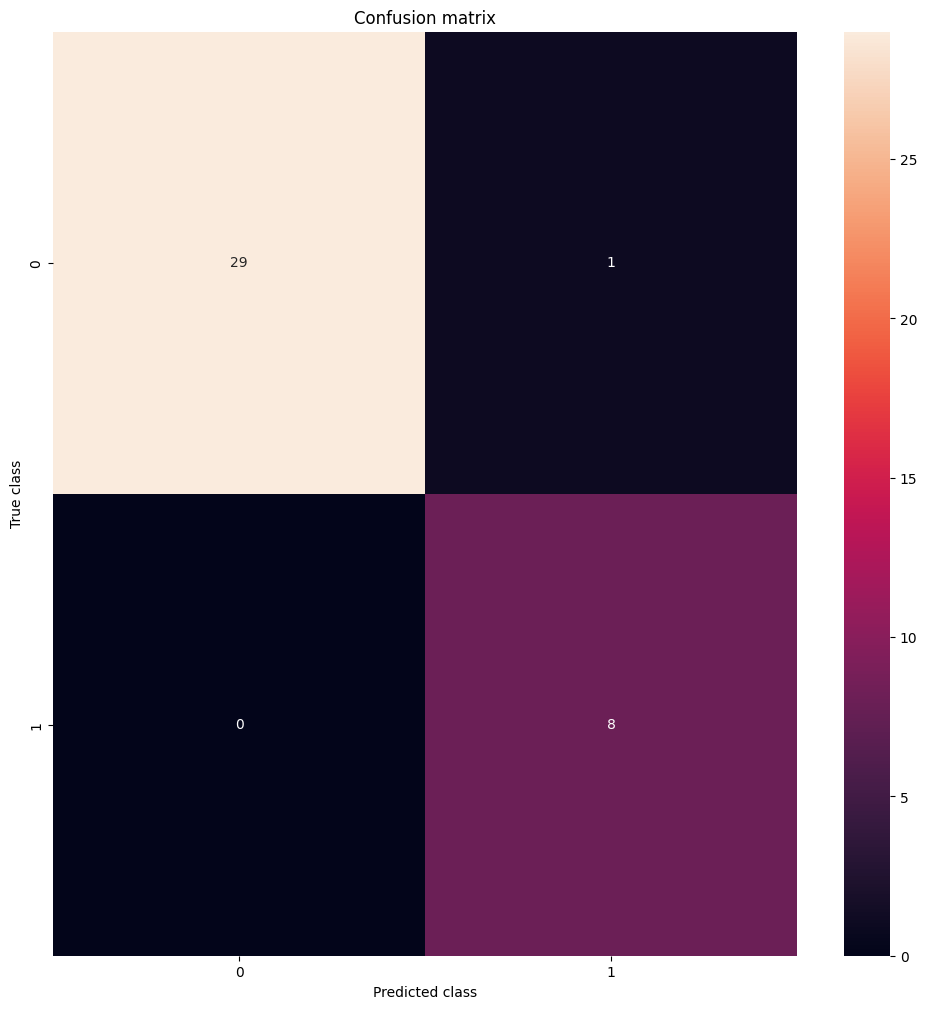

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.89      1.00      0.94         8

    accuracy                           0.97        38
   macro avg       0.94      0.98      0.96        38
weighted avg       0.98      0.97      0.97        38



In [107]:
mostrar_resultados(y_test, y_pred)

Precisión del modelo SVM: 0.9736842105263158


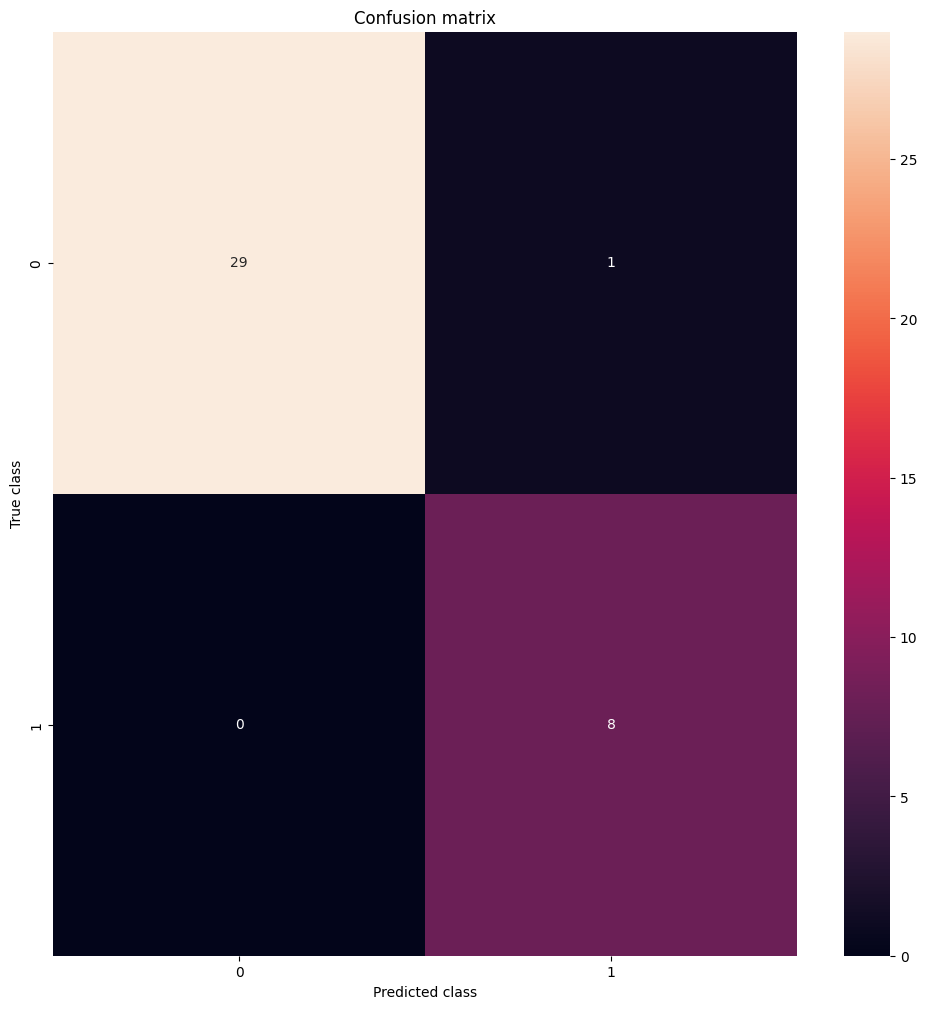

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.89      1.00      0.94         8

    accuracy                           0.97        38
   macro avg       0.94      0.98      0.96        38
weighted avg       0.98      0.97      0.97        38



In [109]:
# Escalar los datos para un mejor rendimiento del modelo (normalización)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inicializar el clasificador SVM
svm_classifier = SVC(kernel='linear', random_state=42)


# Entrenar el modelo SVM
svm_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo SVM:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred )
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
# Mostrar el informe de clasificación
print(classification_report(y_test, y_pred))



In [110]:
# Calcular la precisión
precision = precision_score(y_test, y_pred, pos_label=1)

# Calcular el recall
recall = recall_score(y_test, y_pred, pos_label=1)

auc_roc = roc_auc_score(y_test,y_pred)


print("Precisión:", precision)
print("Sensibilidad:", recall)
print("AUC-ROC:", auc_roc)

Precisión: 0.8888888888888888
Sensibilidad: 1.0
AUC-ROC: 0.9833333333333334
